## Built-in Distributions

 `scipy.stats.norm` is an instance of a **continuous probability distribution** (specifically, the **standard normal**), and it exposes a full suite of methods for **probability, quantiles, sampling, and fitting**.

Here’s a compact summary of what it offers 👇

---

###  Core methods of `scipy.stats.norm`

| Method           | Meaning                                                            | Example                   |
| ---------------- | ------------------------------------------------------------------ | ------------------------- |
| `.pdf(x)`        | **Probability Density Function** — height of the bell curve at `x` | `norm.pdf(0)` → 0.3989    |
| `.cdf(x)`        | **Cumulative Distribution Function** — P(X ≤ x)                    | `norm.cdf(1.96)` → 0.975  |
| `.ppf(q)`        | **Percent Point Function** (inverse CDF, i.e. quantile)            | `norm.ppf(0.975)` → 1.96  |
| `.rvs(size=...)` | **Random variates** (sampling)                                     | `norm.rvs(size=1000)`     |


You can **specify mean and standard deviation** for a nonstandard normal easily via the `loc` and `scale` arguments.



In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:

from scipy.stats import norm
import numpy as np

In [4]:


# Statistical Table Lookups
alpha = 0.01
z = norm.ppf(1 - alpha / 2)
z

np.float64(2.5758293035489004)

In [5]:
# p Values !
p_val = 1 - norm.cdf(2.3)
p_val

np.float64(0.010724110021675837)

In [6]:
# random values "drawn" from normal:
norm.rvs(size = 5)

array([-0.39395764,  0.7090911 ,  0.84183173, -1.04473958,  1.24628677])

### Empirical Cumulative Distribution Function

The density -like a histogram- has a few complications that include the arbitrary choice of bin width (kernel width for density) and the loss of information. Welcome to the *empirical cumulative distribution function* **ecdf**

In [7]:
import matplotlib.pyplot as plt

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

def plot_2_ecdf(x1,x2, leg = ('male', 'female'), xlab = 'birth weight(g)'):
  ecdf1_x, ecdf1_y = ecdf(x1)
  ecdf2_x, ecdf2_y = ecdf(x2)

  # Plot all ECDFs on the same plot
  fig, ax = plt.subplots(figsize=(6, 2.5))
  _ = ax.plot(ecdf1_x, ecdf1_y, marker = '.', linestyle = 'none')
  _ = ax.plot(ecdf2_x, ecdf2_y, marker = '.', linestyle = 'none')


  # Make nice margins
  plt.margins(0.02)

  # Annotate the plot
  plt.legend(leg, loc='lower right')
  _ = plt.xlabel(xlab)
  _ = plt.ylabel('ECDF')

  # Display the plot
  plt.grid()
  plt.show()

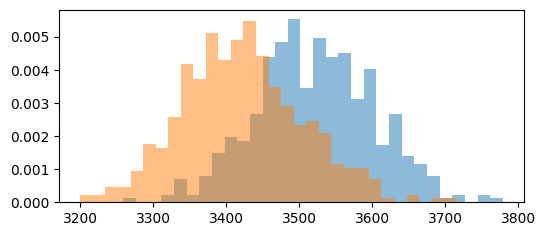

In [39]:
#male birth weight:
mbw = norm.rvs(loc = 3527, scale = 84, size = 500)
#female birth weight:
fbw = norm.rvs(loc = 3423, scale = 82, size = 500)

# Plot normalized histograms
plt.figure(figsize=(6, 2.5))
plt.hist(mbw, bins=30, density=True, alpha=0.5, label="male");
plt.hist(fbw, bins=30, density=True, alpha=0.5, label="female");

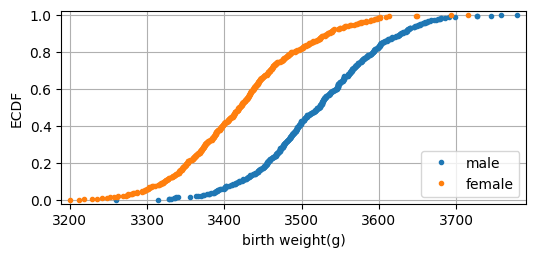

In [40]:
plot_2_ecdf(mbw, fbw)

## iPyWidgets

Widgets are super useful for interactive plots !

Remember our HomeOffice Simulation; what if we want to explore different parameters? Instead of creating dozens of separate plots, we can use a widget !

In [8]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [1]:
# If you're in Google Colab, first run this setup cell:
from ipywidgets import interact, interactive_output, FloatSlider, IntSlider, HBox, VBox
from IPython.display import display

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def HomeOfficeSimulation(n = 20, n_weeks = 100, daysInWeek = 5,
                         days_in_office = 2, seed=123,
                         pSick = 0, #probability of being sick
                         plotIt = True,
                         verbose = False):
  rng = np.random.default_rng(seed)

  #sanity check:
  if days_in_office > daysInWeek:
    days_in_office = daysInWeek

  NumEmpInOffice = np.zeros(n+1, dtype = "int")#this is a 1D array of length n+1
  for j in range(n_weeks):
    weekdays = np.zeros(daysInWeek, dtype = "int")#this is a 1D array of length 5

    for i in range(n):
      empChoice = rng.choice(np.arange(1,daysInWeek+1),days_in_office, replace = False )
      #sick days:
      notSick = np.random.rand(days_in_office) > pSick   # True = keep
      empChoice = empChoice[notSick]
      weekdays[empChoice -1 ] += 1#this is of length 5 !!

    #NumEmpInOffice[weekdays] += 1 #for each of 5 elements I increment by 1
    for w in weekdays:
      NumEmpInOffice[w] += 1

    if (verbose):
      print(weekdays)
      #print(NumEmpInOffice)
      print(pd.Series(NumEmpInOffice, index=range(n + 1)).to_dict())

    #if np.sum(weekdays)!= 2*n:
    #  print("sth. is wrong!") #sanity check!
  #we would like to return the probability !
  #of course they have to add to one in total
  prob = NumEmpInOffice/np.sum(NumEmpInOffice)
  if plotIt:
    plt.figure(figsize=(7, 3))
    plt.bar(np.arange(n+1),prob)
    plt.xlabel("Number of employees in the office")
    plt.ylabel("Probability")
    plt.title(f"Distribution of employees in office (n={n})")
    plt.grid(alpha=0.3)
    plt.show()
  return
  #return NumEmpInOffice/(n_weeks*5)#(n_weeks*daysInWeek)


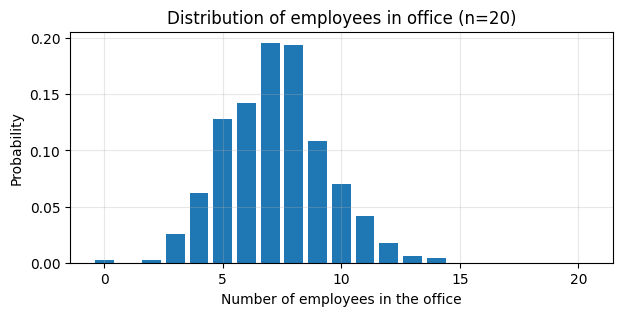

In [3]:
onesim=HomeOfficeSimulation(n = 20, daysInWeek = 5, pSick = 0.1, days_in_office = 2)

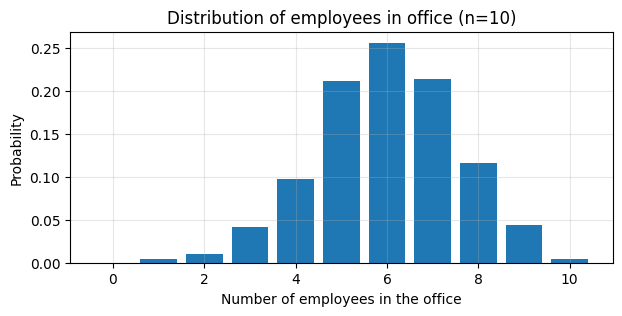

In [4]:
onesim=HomeOfficeSimulation(n = 10, daysInWeek = 5, days_in_office = 3)

In [5]:
# ------------------------------------------------------------
# 5. Interactive dashboard
# ------------------------------------------------------------
interact(HomeOfficeSimulation,
         n=IntSlider(value=20, min=1, max=100, step=5, description="num employees"),
         pSick=FloatSlider(value=0.05, min=0, max=0.95, step=0.05, description="Probability of being sick"),
         daysInWeek=IntSlider(value=5, min=1, max=365, step=1, description="days in week"),
         days_in_office=IntSlider(value=2, min=0, max=100, step=1, description="Days in Office"),
         );


interactive(children=(IntSlider(value=20, description='num employees', min=1, step=5), IntSlider(value=100, de…

In [6]:
# define sliders (same as in interact)
controls = {
    'n': IntSlider(value=20, min=1, max=100, step=5, description="num employees"),
    'pSick': FloatSlider(value=0.05, min=0, max=0.95, step=0.05, description="Prob sick"),
    'daysInWeek': IntSlider(value=5, min=1, max=365, step=1, description="days in week"),
    'days_in_office': IntSlider(value=2, min=0, max=100, step=5, description="days in office")
}

# link sliders to output
out = interactive_output(HomeOfficeSimulation, controls)

# layout: sliders on the left, output on the right
ui = HBox([
    VBox(list(controls.values())),
    out
])

display(ui)

____

## **Student Task 1: Visualizing a Confidence Interval for a Binomial Proportion**

### **Goal**

Create an interactive plot showing how the confidence interval for a binomial proportion
$$
\hat{p} = \frac{x}{n}
$$
changes with:

* sample size ( n )
* number of successes ( x )
* and confidence level (e.g. 90%, 95%, 99%).

---

### **Step 1: Start with the function**


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def show_ci(x=4, n=20, conf_level = 0.95):
    """
    Plot the estimated proportion and its normal-approximation confidence interval.
    """
    p_hat = x / n # p_hat=observed proportion
    z = norm.ppf(1 - (1 - conf_level) / 2) # multiplier 
    se = np.sqrt(p_hat * (1 - p_hat) / n) # standard deviation of p_hat (standard error)
    lower = p_hat - z * se
    upper = p_hat + z * se

    # clip between 0 and 1
    lower, upper = max(0, lower), min(1, upper)

    # --- smarter limits ---
    margin = 0.1 * (upper - lower)
    xmin = max(0, lower - margin)
    xmax = min(1, upper + margin)

    plt.figure(figsize=(5, 1.5))
    plt.errorbar(p_hat, 0, xerr=[[p_hat - lower], [upper - p_hat]], fmt='o', color='C0', capsize=5)
    plt.xlim(xmin, xmax)
    plt.yticks([])
    plt.title(f"p̂ = {p_hat:.2f},  {int(conf_level*100)}% CI = [{lower:.2f}, {upper:.2f}]")
    plt.xlabel("Proportion")
    plt.show()

controls = {
    'x': IntSlider(value=5, min=1, max=100, step=5, description="x"),
    'n': IntSlider(value=20, min=20, max=100, step=1, description="n"),
    'conf_level': FloatSlider(value=0.95, min=0.01, max=1, step=0.1, description="conf_level")
}

# link sliders to output
out = interactive_output(show_ci, controls)

# layout: sliders on the left, output on the right
ui = HBox([
    VBox(list(controls.values())),
    out
])

display(ui)

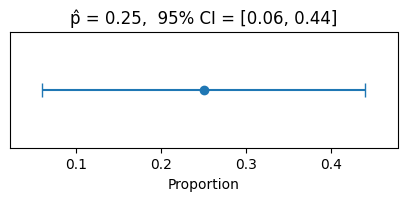

In [24]:
show_ci(x=5, n=20)

### **Step 2: Add widgets**

Add three widgets:

* `n`: sample size (slider, 10–500)
* `x`: number of successes (slider, 0–n)
* `conf_level`: confidence level (dropdown with 0.90, 0.95, 0.99)

Please place the sliders *next to* the plot using `HBox` and `VBox`.

---

### **Extra Credit: Dynamic constraint**

Make sure the **`x` slider** never exceeds `n`.
(Hint: use `observe()` to update `x.max = n.value` whenever `n` changes.)



-----

## **Student Task 2: Interactive Power Analysis for Two Proportions**

We learned about the concept of power of a test as the "inverse of false negatives" i.e. power = 1-FN.

The **power** of a statistical test is the probability that it correctly rejects the null hypothesis when the alternative hypothesis is true — in other words, it’s the test’s ability to detect a real effect.
A test with **high power** is less likely to miss true effects (fewer Type II errors), while a low-power test often fails to detect them even when they exist.

Here is a function which computes either the power given a sample size or the required sample size to achieve a certain power !


In [ ]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

def power_prop_test(n=None, p1=None, p2=None, power=None, sig_level=0.05):
    effect_size = proportion_effectsize(p1, p2)
    analysis = NormalIndPower()
    return analysis.solve_power(effect_size=effect_size, nobs1=n, alpha=sig_level, power=power, ratio=1)

In [ ]:
power_prop_test(n=200, p1=0.5, p2=0.6)
power_prop_test(p1=0.5, p2=0.6, power=0.8)

1. Write a function `show_power_plot(p1=0.5, p2=0.6, alpha=0.05)` which plots the power as a function of sample size

2. Combine it with widgets to make it interactive!